---
# <span style="color:pink">DS3000B/9000B Final Exam</span>

## <span style="color:pink">Student ID #: _________</span>

## <span style="color:pink">Grade: __ / 60</span>

## <span style="color:pink">General Comments</span>

- Using generative AI tools such as ChatGPT and Copilot is considered an act of cheating and you will receive 0 mark for the exam.

- You are allowed to use any other resources on your computer or the internet, but you are **not** allowed to share documents, post questions to forums such as Stack Overflow (this includes use of homework helpers such as Chegg), or communicate in any way with people inside or outside the exam room.

- Having open on your computer any communication tools (*e.g.*, Discord, Teams, Slack, Outlook etc.) being either web-based or app-based (or having them running in the background) is considered an act of cheating and you will receive 0 mark for the exam.

- To finish the exam in the alloted time, you will have to work efficiently.

- Please read the entirety of each question carefully.

- You must have your work submitted by 5:00PM of April 16, 2024, to the "Assignments" section of the course's site on OWL, *i.e.*, the same place where you originally downloaded the notebook. Late submissions will be scored with 0 mark.

- To avoid technical difficulties at the time of submission, please initiate your submission process at the latest five minutes before the deadline.

- Some questions demand a **written answer**. Please answer these in full English sentences in a markdown cell right underneath the question.

- For your figures ensure that all axes are labeled in an informative way.

- Your submitted work must have the outputs of all cells as we may not run the whole notebook for grading.

## <span style="color:pink">Additional Guidance</span>

- If at any point you are asking yourself "are we supposed to...", write your assumptions clearly and proceed accordingly.

- If you have no clue how to approach a question, skip it, and move on. Revisit the skipped one(s) after you are done with others.

- Where applicable, take advantage of the function argument `n_jobs=-1` to speed up processes with parallel computing.

- To navigate within the notebook, better to take advantage of the notebook's table of contents (normally on the left side of the screen). It saves you some time compared to pure scrolling with the mouse. In VScode, it is nested under the "OUTLINE" tab which is by default minimized unless you click it to maximize.

- Please ensure that your results are generated using the provided random seed, where applicable.

---
## <span style="color:orange">Toolbox</span>

In [1]:
# Throughout your work, use the seed defined below
import numpy as np

seed = 1604
np.random.seed(seed)
import warnings

warnings.filterwarnings("ignore")
import pandas as pd

pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from IPython.display import display
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

sns.set_theme(style="darkgrid", palette="pastel")

---
## Dataset Description

You will find two CSV files, i.e., "Q1_anomalous.csv" and "Q1_normal.csv". Each file represents real-world measurement data of a heat experiment inside a steel furnace. "Q1_normal.csv" has all the normal experimental samples, while "Q1_anomalous.csv" has all the abnormal experimental samples.

In the datasets, the attributes X1, X2, ..., X8 are the vibration measurements signals. Each feature represents a vibration signal inside the furnace at several frequency bands. Each sample is a measurement recorded at a time instance (the "Timestamp" attribute).

---
## Question 1 - <span style="color:red">[25]</span> - Classification

### Q1.1 - <span style="color:red">[3]</span> - Read "Q1_normal.csv" as a pandas dataframe and print out the tail and shape of it. Also, read "Q1_anomalous.csv" as a pandas dataframe and print out the head and shape of it.

In [2]:
df1 = pd.read_csv("Q1_normal.csv")
display(df1.tail())
print(f"Shape of the normal dataset: {df1.shape}")

df2 = pd.read_csv("Q1_anomalous.csv")
display(df2.head())
print(f"Shape of the anomalous dataset: {df2.shape}")

,Timestamp,X1,X2,X3,X4,X5,X6,X7,X8,Anomaly_Tag
76588,3254,0.47554,0.99823,21.050,2.8235,0.47411,1.0094,18.208,3.2173,0
76589,3260,0.47104,0.99485,21.128,2.8356,0.53391,1.1550,21.879,2.8952,0
76590,3263,0.47282,1.00130,21.211,2.8488,0.47561,1.2447,24.159,3.0822,0
76591,3264,0.47165,0.99995,21.236,2.8573,0.47426,1.1809,24.473,3.1747,0
76592,3268,0.47900,1.01150,21.357,2.8638,0.55515,1.1256,22.742,3.1582,0


Shape of the normal dataset: (76593, 10)


,Timestamp,X1,X2,X3,X4,X5,X6,X7,X8,Anomaly_Tag
0,1378,0.76356,6.0467,391.61,523.48,0.92730,1.51430,6.5917,2.5061,1
1,1379,0.76313,6.0146,389.44,519.34,0.91443,1.42520,6.6227,2.5104,1
2,1382,0.73073,5.8869,380.79,500.64,0.52303,0.97201,6.8065,2.6115,1
3,1383,0.72927,5.8573,377.56,495.20,0.57328,1.00660,6.7078,2.5449,1
4,1384,0.72876,5.8050,373.35,488.55,0.57355,1.00810,6.5600,2.4355,1


Shape of the anomalous dataset: (2599, 10)


### Q1.2 - <span style="color:red">[3]</span> - Concatenate the two dataframes from Q1.1, and with "Anomaly_Tag" as target, do a shuffled train/test split with a test size of 30%.

In [3]:
# Concatenate the two datasets into one
df = pd.concat([df1, df2], axis=0)
df = df.reset_index(drop=True)

X = df.drop(columns=["Anomaly_Tag"])
y = df["Anomaly_Tag"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed, shuffle=True
)

### Q1.3 - <span style="color:red">[10]</span> - Train an instance of each of the Decision Tree, Bagging, and Random Forest classifiers using their default arguments. Plot the feature importance for each classifier.

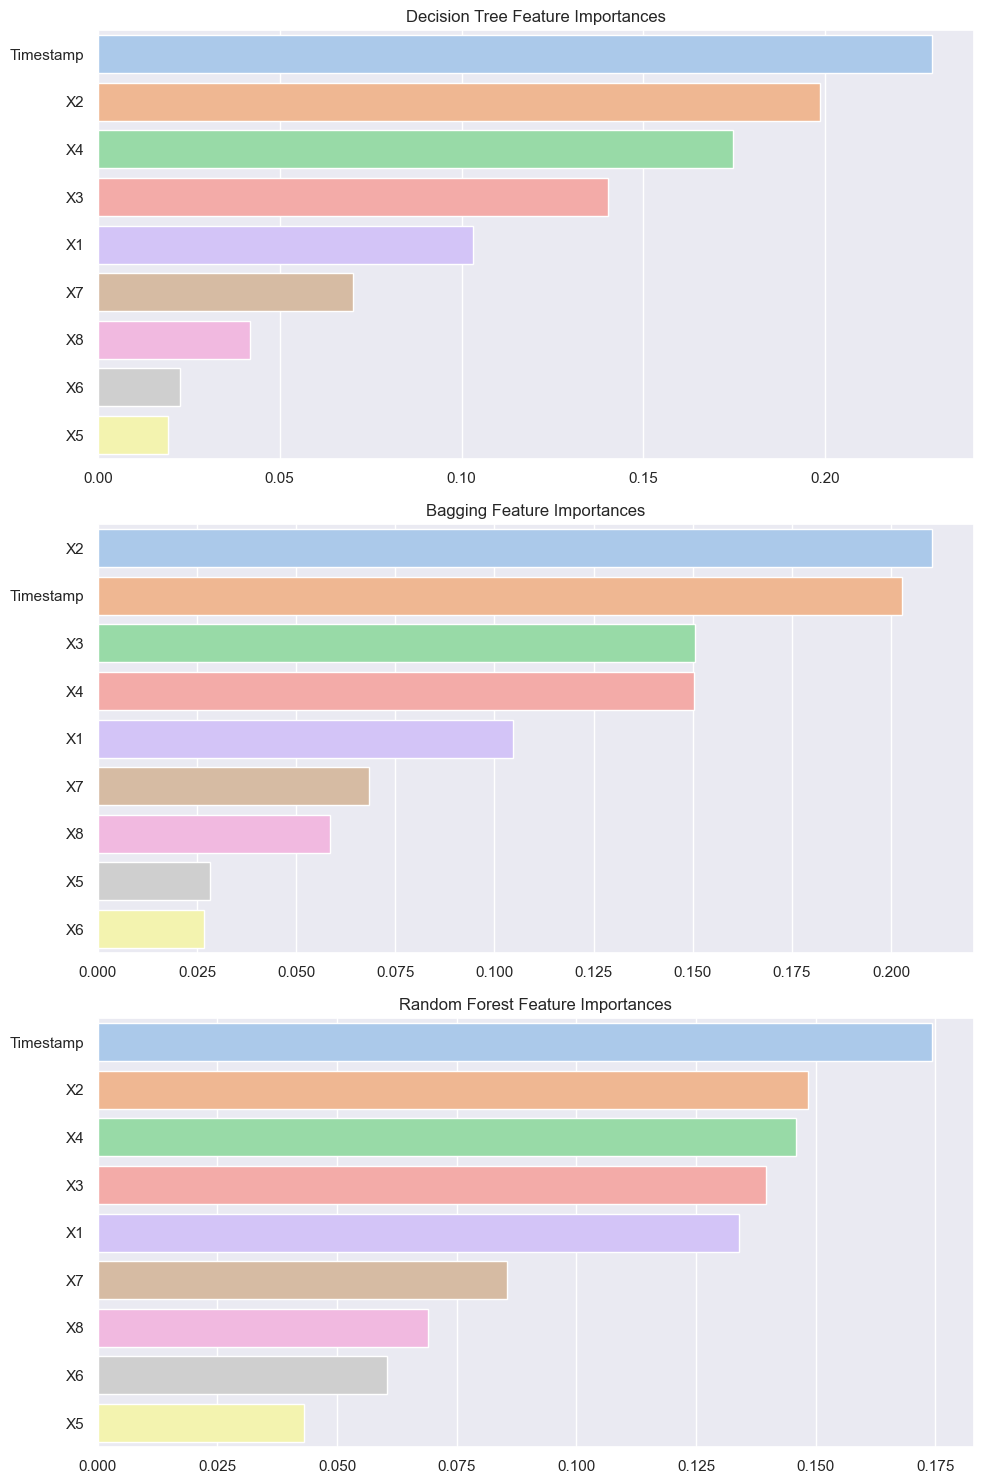

In [4]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=seed)
dt.fit(X_train, y_train)
dt_importances = dt.feature_importances_

# Bagging
bagging = BaggingClassifier(random_state=seed, n_jobs=-1)
bagging.fit(X_train, y_train)
bagging_importances = np.mean(
    [tree.feature_importances_ for tree in bagging.estimators_], axis=0
)

# Random Forest
rf = RandomForestClassifier(random_state=seed, n_jobs=-1)
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_

# Sort the importances in descending order
dt_importances, bagging_importances, rf_importances = (
    pd.Series(dt_importances, index=X.columns).sort_values(ascending=False),
    pd.Series(bagging_importances, index=X.columns).sort_values(ascending=False),
    pd.Series(rf_importances, index=X.columns).sort_values(ascending=False),
)

# Plot the feature importances
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
sns.barplot(y=dt_importances.index, x=dt_importances, ax=ax[0])
ax[0].set_title("Decision Tree Feature Importances")
sns.barplot(y=bagging_importances.index, x=bagging_importances, ax=ax[1])
ax[1].set_title("Bagging Feature Importances")
sns.barplot(y=rf_importances.index, x=rf_importances, ax=ax[2])
ax[2].set_title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

### Q1.4 - <span style="color:red">[9]</span> - Report the performance of each model trained in Q1.3 using the metrics Recall, Precision, F1-score, and Confusion matrix. All on the test set.

In [5]:
# Function to report the precision, recall, f1 score, and confusion matrix for a model
def model_metrics(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = sk.metrics.precision_score(y_test, y_pred).round(3)
    recall = sk.metrics.recall_score(y_test, y_pred).round(3)
    f1 = sk.metrics.f1_score(y_test, y_pred).round(3)
    confusion_matrix = sk.metrics.confusion_matrix(y_test, y_pred)
    print(f"Metrics for {model_name}:")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{confusion_matrix}\n\n")


# Report the model metrics for each model
model_metrics(dt, "Decision Tree", X_test, y_test)
model_metrics(bagging, "Bagging", X_test, y_test)
model_metrics(rf, "Random Forest", X_test, y_test)

Metrics for Decision Tree:
Precision: 0.91
Recall: 0.896
F1 Score: 0.903
Confusion Matrix:
[[22893    70]
 [   83   712]]


Metrics for Bagging:
Precision: 0.982
Recall: 0.878
F1 Score: 0.927
Confusion Matrix:
[[22950    13]
 [   97   698]]


Metrics for Random Forest:
Precision: 0.984
Recall: 0.908
F1 Score: 0.944
Confusion Matrix:
[[22951    12]
 [   73   722]]




---
## Question 2 - <span style="color:red">[25]</span> - Dimensionality Reduction

### Q2.1 - <span style="color:red">[6]</span> - Build and train a `Pipeline` that uses a PCA to extract 2 PCs of the training set and create a Random Forest model which consists of 25 base decision trees. How much variance the two PCs explain?

In [6]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Pipeline with PCA and Random Forest with 25 base estimators
pipe = Pipeline(
    [
        ("pca", PCA(n_components=2, random_state=seed)),
        ("rf", RandomForestClassifier(random_state=seed, n_jobs=-1, n_estimators=25)),
    ]
)
pipe.fit(X_train, y_train)

# variance explained by the two principal components
print(
    f"Explained variance by the two principal components: {pipe.named_steps['pca'].explained_variance_ratio_}"
)

Explained variance by the two principal components: [0.35790574 0.20153344]


### Q2.2 - <span style="color:red">[3]</span> - Report the same metrics as Q1.4 to evaluate the pipeline of Q2.1.

In [7]:
model_metrics(pipe, "Pipeline", X_test, y_test)

Metrics for Pipeline:
Precision: 0.344
Recall: 0.132
F1 Score: 0.191
Confusion Matrix:
[[22763   200]
 [  690   105]]




### Q2.3 - <span style="color:red">[8]</span> - Use a 4-fold grid search to see if you can make the performance of the pipeline any better (use cross-validated accuracy score as your basis for the comparison). Here are the hyperparameters to tune:

A) the number of base estimators in the forest, i.e., find the better value among the three numbers 10, 25, and 50,

B) the maximum tree depth, i.e., find the better value among the two numbers 10 and 20.

Finally, print out the detected better hyperparameter values and cross-validated score.

In [8]:
# Define the hyperparameters to tune
param_grid = {
    "rf__n_estimators": [10, 25, 50],
    "rf__max_depth": [10, 20],
}

# Grid search with 4-fold cross-validation
grid = GridSearchCV(pipe, param_grid, cv=4, n_jobs=-1)
grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")
print(f"Cross-validated score of the best estimator: {grid.best_score_}\n")

model_metrics(grid, "Grid Search", X_test, y_test)

Best hyperparameters: {'rf__max_depth': 10, 'rf__n_estimators': 50}
Cross-validated score of the best estimator: 0.9682144401653787

Metrics for Grid Search:
Precision: 0.583
Recall: 0.062
F1 Score: 0.111
Confusion Matrix:
[[22928    35]
 [  746    49]]




### Q2.4 - <span style="color:red">[8]</span> - Compare the performance (i.e., based on test set) of the models trained in Q1.3 against your best pipe model. In a markdown cell, report your observations and conclusions. If you are asked to choose your final model solely based on the test set AUC of ROC, which model you select?

Metrics for Decision Tree:
Precision: 0.91
Recall: 0.896
F1 Score: 0.903
Confusion Matrix:
[[22893    70]
 [   83   712]]


Metrics for Bagging:
Precision: 0.982
Recall: 0.878
F1 Score: 0.927
Confusion Matrix:
[[22950    13]
 [   97   698]]


Metrics for Random Forest:
Precision: 0.984
Recall: 0.908
F1 Score: 0.944
Confusion Matrix:
[[22951    12]
 [   73   722]]


Metrics for Pipeline:
Precision: 0.344
Recall: 0.132
F1 Score: 0.191
Confusion Matrix:
[[22763   200]
 [  690   105]]


Metrics for Grid Search:
Precision: 0.583
Recall: 0.062
F1 Score: 0.111
Confusion Matrix:
[[22928    35]
 [  746    49]]




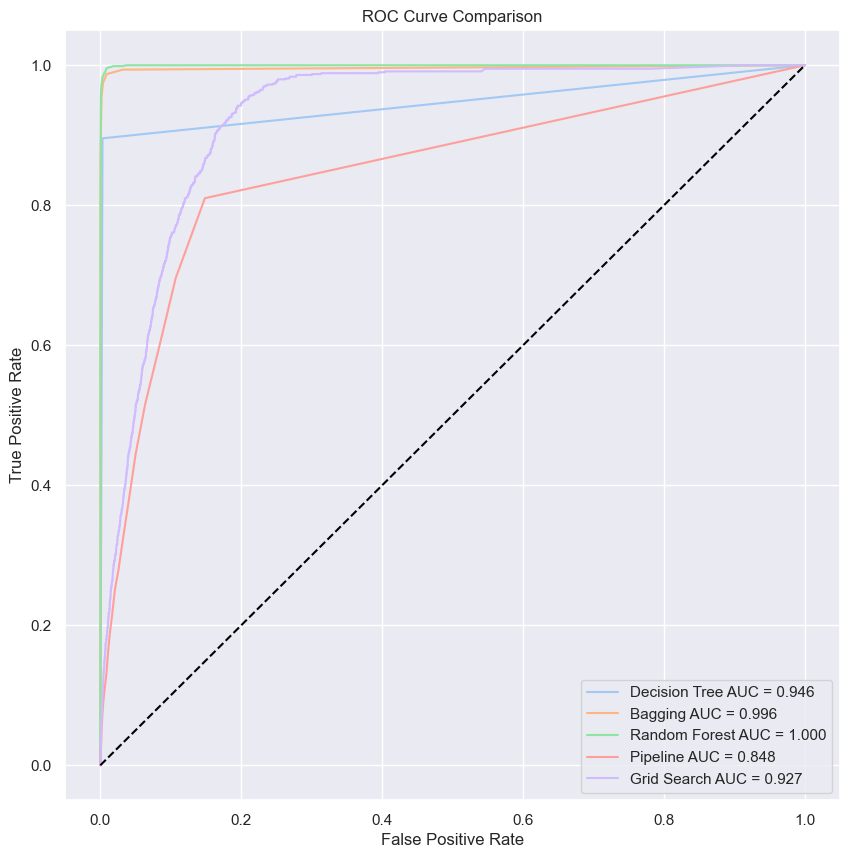

Decision Tree AUC: 0.946
Bagging AUC: 0.996
Random Forest AUC: 1.000
Pipeline AUC: 0.848
Grid Search AUC: 0.927


In [9]:
from sklearn.metrics import roc_auc_score, roc_curve

# model metrics for all models
model_metrics(dt, "Decision Tree", X_test, y_test)
model_metrics(bagging, "Bagging", X_test, y_test)
model_metrics(rf, "Random Forest", X_test, y_test)
model_metrics(pipe, "Pipeline", X_test, y_test)
model_metrics(grid, "Grid Search", X_test, y_test)

# Using predict_proba to get the positive class probabilities
dt_auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
bagging_auc = roc_auc_score(y_test, bagging.predict_proba(X_test)[:, 1])
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
pipe_auc = roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1])
grid_auc = roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1])

# Getting FPR and TPR for each model using probabilities
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
bagging_fpr, bagging_tpr, _ = roc_curve(y_test, bagging.predict_proba(X_test)[:, 1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
pipe_fpr, pipe_tpr, _ = roc_curve(y_test, pipe.predict_proba(X_test)[:, 1])
grid_fpr, grid_tpr, _ = roc_curve(y_test, grid.predict_proba(X_test)[:, 1])

# Plot ROC curve for each model
plt.figure(figsize=(10, 10))
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree AUC = {dt_auc:.3f}")
plt.plot(bagging_fpr, bagging_tpr, label=f"Bagging AUC = {bagging_auc:.3f}")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest AUC = {rf_auc:.3f}")
plt.plot(pipe_fpr, pipe_tpr, label=f"Pipeline AUC = {pipe_auc:.3f}")
plt.plot(grid_fpr, grid_tpr, label=f"Grid Search AUC = {grid_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# Print AUC ROC score for each model
print(f"Decision Tree AUC: {dt_auc:.3f}")
print(f"Bagging AUC: {bagging_auc:.3f}")
print(f"Random Forest AUC: {rf_auc:.3f}")
print(f"Pipeline AUC: {pipe_auc:.3f}")
print(f"Grid Search AUC: {grid_auc:.3f}")

# Answer 2.4:
The best model is random forest.
I would choose the base random forest classifier if I were deciding only on AUC ROC because its ROC AUC score of around 0.953 is the highest among the models.

---
## Question 3 - <span style="color:red">[10]</span> - Probability

The following function is a slightly modified version of the ant escape simulation problem which you had seen in Assignment 2. Every time you execute this function, it returns 1 if the ant manages to escape the box, else 0. Therefore, it simulates a data generating process with a binary sample space (i.e., escape). Do not modify the function, just run the following cell to load the function and proceed to the next question.

In [10]:
def ant_escape_simulation(distribution):
    """
    Returns 1 if the ant manages to escape the box in "time" seconds, otherwise 0.
    "distribution" determines what type of distribution the random number generator
    should follow to determine the ant's random walk in space.
    """
    x = 50  # box size in x-direction
    y = 50  # box size in y-direction
    time = 400  # seconds

    # coordinate of one arbitrary opening of size 5 mm
    x_open = [20, 30]
    y_open = y - 1

    # distance in millimeters that the ant travels per second
    delta = 2

    # initialize X and Y coordinates for the ant
    X = np.zeros([time])
    Y = np.zeros([time])

    # ant's initial location
    x_ant = x / 2
    y_ant = y / 2

    i = -1
    ## Main loop:
    for t in range(time):
        if distribution == "uniform":
            u = np.random.uniform(low=0.0, high=1.0)
        elif distribution == "normal":
            u = abs(np.random.normal())

        if u < 0.25:
            x_ant = x_ant - delta
        if (u >= 0.25) & (u < 0.5):
            x_ant = x_ant + delta
        if (u >= 0.5) & (u < 0.75):
            y_ant = y_ant + delta
        if (u >= 0.75) & (u <= 1):
            y_ant = y_ant - delta

        if (x_ant > 0) & (x_ant < x) & (y_ant > 0) & (y_ant < y):
            i += 1
            X[i] = x_ant
            Y[i] = y_ant
            x_ant_pre = x_ant
            y_ant_pre = y_ant
        else:
            while (x_ant <= 0) | (x_ant >= x) | (y_ant <= 0) | (y_ant >= y):
                if distribution == "uniform":
                    u = np.random.uniform(low=0.0, high=1.0)
                elif distribution == "normal":
                    u = abs(np.random.normal())

                if u < 0.25:
                    x_ant = x_ant_pre - delta
                if (u >= 0.25) & (u < 0.5):
                    x_ant = x_ant_pre + delta
                if (u >= 0.5) & (u < 0.75):
                    y_ant = y_ant_pre + delta
                if (u >= 0.75) & (u <= 1):
                    y_ant = y_ant_pre - delta

            i += 1
            X[i] = x_ant
            Y[i] = y_ant

        # check if the ant escapes through the opening
        if (X[i] >= x_open[0]) & (X[i] <= x_open[-1]) & (Y[i] == y_open):
            return 1
            break
    return 0

### Q3.1 - <span style="color:red">[10]</span> - Using "uniform" distribution for the ant's random walk in the function, run 300 experiments to approximate and plot the probability mass function of escape for 10 attempts of the ant. Redo this with "normal" distribution for the random walk. Your final product should be one plot window with two overlaid KDE plots: one for the case of uniform distribution and one for the normal. Report the expected value of escape for both cases. With which distribution the ant is more likely to escape?   

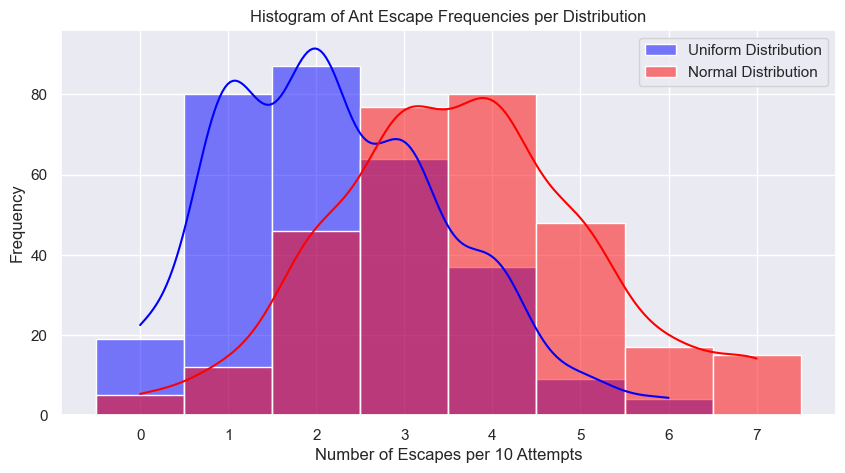

Mean number of escapes for uniform distribution: 2.21
Mean number of escapes for normal distribution: 3.6733333333333333


In [11]:
# 300 experiments and 10 attempts per experiment
experiments = 300
attempts = 10

results_uniform = np.zeros([experiments])
results_normal = np.zeros([experiments])

for i in range(experiments):
    for j in range(attempts):
        results_uniform[i] += ant_escape_simulation("uniform")
        results_normal[i] += ant_escape_simulation("normal")

# Plot the results directly without normalization to see the number of escapes
plt.figure(figsize=(10, 5))
sns.histplot(
    results_uniform,
    kde=True,
    color="blue",
    label="Uniform Distribution",
    binwidth=1,
    discrete=True,
)
sns.histplot(
    results_normal,
    kde=True,
    color="red",
    label="Normal Distribution",
    binwidth=1,
    discrete=True,
)
plt.xlabel("Number of Escapes per 10 Attempts")
plt.ylabel("Frequency")
plt.title("Histogram of Ant Escape Frequencies per Distribution")
plt.legend()
plt.show()

# which distribution is better
print(f"Mean number of escapes for uniform distribution: {np.mean(results_uniform)}")
print(f"Mean number of escapes for normal distribution: {np.mean(results_normal)}")

The ant has a higher probability of escape using the normal distribution at about 3.5%

$$\mathit{The\;End}$$